<!DOCTYPE html>
<head>
    <meta charset="utf-8">
    <link rel="stylesheet" href="styles.css">
    <link href='https://fonts.googleapis.com/css?family=Merriweather' rel='stylesheet'>
    <div style="background-color: #3D0069; color: white ; font-family: 'Merriweather'; font-weight: bold; text-align: center; padding: 40px 0; font-size: 16px;">
    <h1>Interrogation of the Parch & Posey Database</h1>
        by
    
    Buhari Shehu (The Datavestigator)
    

</head>


<link href='https://fonts.googleapis.com/css?family=Merriweather' rel='stylesheet'>
<h2 style="background-color: #F5E8DA; color: #50006C; font-family: 'Merriweather'; font-weight: bold; font-size: 20px; text-align: center; padding: 10px 0;">
  Introduction
</h2>


<img src="erd.png" width=800 height=400 />

In [166]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [156]:
%%sql
SELECT strftime('%Y %m', occurred_at) months, ROUND(AVG(total_amt_usd), 2) average_sales
FROM orders
WHERE occurred_at LIKE '2015%'
GROUP BY 1

 * sqlite:///pandp.db
Done.


months,average_sales
2015 01,2922.73
2015 02,3239.69
2015 03,4026.38
2015 04,3672.79
2015 05,2916.65
2015 06,3314.22
2015 07,3163.67
2015 08,3198.31
2015 09,3648.92
2015 10,3166.8


In [72]:
%%sql
SELECT w.channel, ROUND(SUM(o.total_amt_usd), 2) total_sales
FROM orders o
JOIN accounts a
ON o.account_id = a.id
JOIN web_events w
ON w.account_id = a.id
WHERE o.occurred_at BETWEEN '2015-01-01' AND '2016-01-01'
GROUP BY 1
ORDER BY 2 DESC;

 * sqlite:///pandp.db
Done.


channel,total_sales
direct,201196130.62
facebook,31954065.03
organic,31918987.73
adwords,30321237.21
twitter,16374278.84
banner,14248005.61


## 2. Connecting to a serverless SQL database

We can connect to a SQLite database as follows: 

1. We need to install some dependencies. This includes the following Python modules: 

 - Running ***locally***: Once-off installations
      - `pip install sqlalchemy`
      - `pip install ipython-sql`
      - `pip install pymysql`

 - Running on ***Google Colab***: 
      - no dependencies required

In [1]:
%load_ext sql

In [4]:
# Load SQLite database
%sql sqlite:///pandp.db

<div style="border: 5px solid #6f00ff;
    border-radius: 20px; text-align: center; font-size: 20px; font-family: 'Merriweather'; padding: 16px 0; background-color: #D9EEE1">
  <b>Which tables are in the database?</b>
</div>

In [8]:
%%sql
SELECT name
FROM sqlite_master 
WHERE type IN ('table','view') AND name NOT LIKE 'sqlite_%' 
ORDER BY 1;

 * sqlite:///pandp.db
Done.


name
accounts
orders
region
sales_reps
web_events


In [16]:
%%sql
SELECT * 
FROM orders
LIMIT 5;

 * sqlite:///pandp.db
Done.


id,account_id,occurred_at,standard_qty,gloss_qty,poster_qty,total,standard_amt_usd,gloss_amt_usd,poster_amt_usd,total_amt_usd
1,1001,2015-10-06 17:31:14,123,22,24,169,613.77,164.78,194.88,973.43
2,1001,2015-11-05 03:34:33,190,41,57,288,948.1,307.09,462.84,1718.03
3,1001,2015-12-04 04:21:55,85,47,0,132,424.15,352.03,0,776.18
4,1001,2016-01-02 01:18:24,144,32,0,176,718.56,239.68,0,958.24
5,1001,2016-02-01 19:27:27,108,29,28,165,538.92,217.21,227.36,983.49


<div style="border: 5px solid #000;
    border-radius: 20px; text-align: center; font-size: 20px; font-family: 'Merriweather'; padding: 16px 0; background-color: #FFF4A3">
  <b>What are the five latest orders?<b>
</div>

In [15]:
%%sql
SELECT *
FROM orders
ORDER BY occurred_at DESC
LIMIT 5;

 * sqlite:///pandp.db
Done.


id,account_id,occurred_at,standard_qty,gloss_qty,poster_qty,total,standard_amt_usd,gloss_amt_usd,poster_amt_usd,total_amt_usd
6451,3841,2017-01-02 00:02:40,42,506,302,850,209.58,3789.94,2452.24,6451.76
3546,3841,2017-01-01 23:50:16,291,36,26,353,1452.09,269.64,211.12,1932.85
6454,3861,2017-01-01 22:29:50,38,167,51,256,189.62,1250.83,414.12,1854.57
3554,3861,2017-01-01 22:17:26,497,0,23,520,2480.03,0,186.76,2666.79
6556,4051,2017-01-01 21:04:25,0,65,50,115,0,486.85,406,892.85


<div style="border: 5px solid #6f00ff;
    border-radius: 20px; text-align: center; font-size: 20px; font-family: 'Merriweather'; padding: 16px 0; background-color: #F5E8DA">
  <b>In which accounts did the top five purchases of all time occur?<b>
</div>

In [18]:
%%sql
SELECT account_id, total_amt_usd
FROM orders
ORDER BY total_amt_usd DESC
LIMIT 5;

 * sqlite:///pandp.db
Done.


account_id,total_amt_usd
4251,232207.07
4161,112875.18
4211,107533.55
2861,95005.82
4101,93547.84


<div style="border: 5px solid #6f00ff;
    border-radius: 20px; text-align: center; font-size: 20px; font-family: 'Merriweather'; padding: 16px 0; background-color: #F5E8DA">
  <b>In which accounts did the lowest five purchases of all time occur?<b>
</div>

In [19]:
%%sql
SELECT account_id, total_amt_usd
FROM orders
ORDER BY total_amt_usd
LIMIT 5;

 * sqlite:///pandp.db
Done.


account_id,total_amt_usd
1131,0
1951,0
2881,0
1221,0
1231,0


<div style="border: 5px solid #6f00ff;
    border-radius: 20px; text-align: center; font-size: 20px; font-family: 'Merriweather'; padding: 16px 0; background-color: #F5E8DA">
  <b>Which records have total purchase greater than $100,000 ?<b>
</div>

In [25]:
%%sql
SELECT *
FROM orders
WHERE total_amt_usd > 100000;

 * sqlite:///pandp.db
Done.


id,account_id,occurred_at,standard_qty,gloss_qty,poster_qty,total,standard_amt_usd,gloss_amt_usd,poster_amt_usd,total_amt_usd
3892,4161,2016-06-24 13:32:55,22591,13,6,22610,112729.09,97.37,48.72,112875.18
3963,4211,2015-03-30 00:05:30,114,14281,0,14395,568.86,106964.69,0,107533.55
4016,4251,2016-12-26 08:53:24,521,16,28262,28799,2599.79,119.84,229487.44,232207.07


In [ ]:
#Which channel which sales rep in what region names of companies that these sales were made?
%%sql
SELECT w.channel
FROM orders
JOIN web_events w
WHERE total_amt_usd > 100000;

<div style="border: 5px solid #6f00ff;
    border-radius: 20px; text-align: center; font-size: 20px; font-family: 'Merriweather'; padding: 16px 0; background-color: #F5E8DA">
  <b>What are the account names and the sales representative for the top three accounts above?</b>
</div>

In [57]:
%%sql
SELECT a.name account_name, s.name sales_rep,  o.total_amt_usd
FROM orders o
JOIN accounts a
ON o.account_id = a.id
JOIN sales_reps s
ON a.sales_rep_id = s.id
WHERE total_amt_usd > 100000
ORDER BY 3 DESC;

 * sqlite:///pandp.db
Done.


account_name,sales_rep,total_amt_usd
Pacific Life,Dawna Agnew,232207.07
Core-Mark Holding,Maryanna Fiorentino,112875.18
EOG Resources,Arica Stoltzfus,107533.55


<div style="border: 5px solid #6f00ff;
    border-radius: 20px; text-align: center; font-size: 20px; font-family: 'Merriweather'; padding: 16px 0; background-color: #F5E8DA">
  <b>What are the names, websites and primary points of contact of the top three accounts above?<b>
</div>

In [31]:
%%sql
SELECT name, website, primary_poc
FROM accounts
WHERE id in (4161, 4211, 4251);

 * sqlite:///pandp.db
Done.


name,website,primary_poc
Core-Mark Holding,www.core-mark.com,Marita Demasi
EOG Resources,www.eogresources.com,Alida Desrosier
Pacific Life,www.pacificlife.com,Kyoko Randall


<div style="border: 5px solid #6f00ff;
    border-radius: 20px; text-align: center; font-size: 20px; font-family: 'Merriweather'; padding: 16px 0; background-color: #F5E8DA">
  <b>What is the unit price of a standard paper?</b>
</div>

In [36]:
%%sql
SELECT standard_amt_usd/standard_qty standard_paper_unit_price_usd
FROM orders
LIMIT 1;

 * sqlite:///pandp.db
Done.


standard_paper_unit_price_usd
4.99


<div style="border: 5px solid #6f00ff;
    border-radius: 20px; text-align: center; font-size: 20px; font-family: 'Merriweather'; padding: 16px 0; background-color: #F5E8DA">
  <b>Which orders contain only standard paper with a quantity greater than 1000?<b>
</div>

In [37]:
%%sql
SELECT *
FROM orders
WHERE standard_qty > 1000 AND poster_qty = 0 AND gloss_qty = 0;

 * sqlite:///pandp.db
Done.


id,account_id,occurred_at,standard_qty,gloss_qty,poster_qty,total,standard_amt_usd,gloss_amt_usd,poster_amt_usd,total_amt_usd
2613,2951,2016-08-15 00:06:12,1171,0,0,1171,5843.29,0,0,5843.29
3260,3491,2014-08-29 22:43:00,1552,0,0,1552,7744.48,0,0,7744.48


<div style="border: 5px solid #6f00ff;
    border-radius: 20px; text-align: center; font-size: 20px; font-family: 'Merriweather'; padding: 16px 0; background-color: #F5E8DA">
  <b>Which orders were placed between 2014-12-29 and 2014-12-30?</b>
</div>

In [44]:
%%sql
SELECT *
FROM orders
WHERE occurred_at BETWEEN '2014-12-29' AND '2014-12-31';

 * sqlite:///pandp.db
Done.


id,account_id,occurred_at,standard_qty,gloss_qty,poster_qty,total,standard_amt_usd,gloss_amt_usd,poster_amt_usd,total_amt_usd
256,1251,2014-12-30 02:30:01,336,52,12,400,1676.64,389.48,97.44,2163.56
604,1451,2014-12-29 07:50:25,412,0,0,412,2055.88,0,0,2055.88
3084,3411,2014-12-29 06:34:35,286,12,22,320,1427.14,89.88,178.64,1695.66
3960,4211,2014-12-29 22:37:31,96,19,16,131,479.04,142.31,129.92,751.27
4163,4341,2014-12-29 04:40:43,584,36,12,632,2914.16,269.64,97.44,3281.24
4465,1251,2014-12-30 02:10:42,510,574,202,1286,2544.9,4299.26,1640.24,8484.4
4697,1451,2014-12-29 07:40:17,54,542,271,867,269.46,4059.58,2200.52,6529.56
6168,3411,2014-12-29 06:27:25,43,615,301,959,214.57,4606.35,2444.12,7265.04
6688,4211,2014-12-29 22:41:19,513,568,190,1271,2559.87,4254.32,1542.8,8356.99


In [46]:
%%sql
SELECT orders.*,
accounts.*
FROM orders
JOIN accounts
ON orders.account_id = accounts.id
LIMIT 5;

 * sqlite:///pandp.db
Done.


id,account_id,occurred_at,standard_qty,gloss_qty,poster_qty,total,standard_amt_usd,gloss_amt_usd,poster_amt_usd,total_amt_usd,id_1,name,website,lat,long,primary_poc,sales_rep_id
1,1001,2015-10-06 17:31:14,123,22,24,169,613.77,164.78,194.88,973.43,1001,Walmart,www.walmart.com,40.23849561,-75.10329704,Tamara Tuma,321500
2,1001,2015-11-05 03:34:33,190,41,57,288,948.1,307.09,462.84,1718.03,1001,Walmart,www.walmart.com,40.23849561,-75.10329704,Tamara Tuma,321500
3,1001,2015-12-04 04:21:55,85,47,0,132,424.15,352.03,0,776.18,1001,Walmart,www.walmart.com,40.23849561,-75.10329704,Tamara Tuma,321500
4,1001,2016-01-02 01:18:24,144,32,0,176,718.56,239.68,0,958.24,1001,Walmart,www.walmart.com,40.23849561,-75.10329704,Tamara Tuma,321500
5,1001,2016-02-01 19:27:27,108,29,28,165,538.92,217.21,227.36,983.49,1001,Walmart,www.walmart.com,40.23849561,-75.10329704,Tamara Tuma,321500


<div style="border: 5px solid #6f00ff;
    border-radius: 20px; text-align: center; font-size: 20px; font-family: 'Merriweather'; padding: 16px 0; background-color: #F5E8DA">
  <b>How much sales were generated by each channel in 2015?</b>
</div>

In [94]:
%%sql
SELECT w.channel, ROUND(SUM(o.total_amt_usd/1e6), 2) total_sales_million_usd
FROM orders o
JOIN accounts a
ON o.account_id = a.id
JOIN web_events w
ON w.account_id = a.id
WHERE o.occurred_at BETWEEN '2015-01-01' AND '2016-01-01'
GROUP BY 1
ORDER BY 2 DESC;

 * sqlite:///pandp.db
Done.


channel,total_sales_million_usd
direct,201.2
facebook,31.95
organic,31.92
adwords,30.32
twitter,16.37
banner,14.25


In [133]:
# create revenue by channel
channel = %sql SELECT w.channel, ROUND(SUM(o.total_amt_usd/1e6), 2) total_sales_million_usd FROM orders o JOIN accounts a ON o.account_id = a.id JOIN web_events w ON w.account_id = a.id WHERE o.occurred_at BETWEEN '2015-01-01' AND '2016-01-01' GROUP BY 1 ORDER BY 2 DESC;
channel_df = channel.DataFrame()

 * sqlite:///pandp.db
Done.


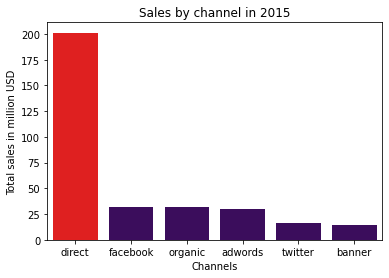

In [138]:
# Create a bar plot with the 'channel' column on the x-axis and the 'total_sales_million_usd' column on the y-axis
# Define colour palette
colour = '#3D0069'
colours = [colour for i in range(len(channel_df)-1)]
palette = ['red']
palette.extend(colours)

ax = sns.barplot(x='channel', y='total_sales_million_usd', data=channel_df, palette=palette)

# Set the x-axis label to 'Channels'
ax.set_xlabel('Channels')

# Set the y-axis label to 'Total sales in million USD'
ax.set_ylabel('Total sales in million USD')

# Set the title to 'Revenue by channel in 2015'
ax.set_title('Sales by channel in 2015');


In [136]:
%%sql
SELECT MAX(occurred_at) 
FROM orders

 * sqlite:///pandp.db
Done.


MAX(occurred_at)
2017-01-02 00:02:40


In [137]:
%%sql
SELECT MIN(occurred_at) 
FROM orders

 * sqlite:///pandp.db
Done.


MIN(occurred_at)
2013-12-04 04:22:44


<div style="border: 5px solid #6f00ff;
    border-radius: 20px; text-align: center; font-size: 20px; font-family: 'Merriweather'; padding: 16px 0; background-color: #F5E8DA">
  <b>What are the 10 latest orders?<b>
</div>

In [158]:
%%sql
SELECT strftime('%Y %m', occurred_at) months, ROUND(AVG(total_amt_usd), 2) average_sales
FROM orders
WHERE occurred_at LIKE '2015%' OR occurred_at LIKE '2016%'
GROUP BY 1

 * sqlite:///pandp.db
Done.


months,average_sales
2015 01,2922.73
2015 02,3239.69
2015 03,4026.38
2015 04,3672.79
2015 05,2916.65
2015 06,3314.22
2015 07,3163.67
2015 08,3198.31
2015 09,3648.92
2015 10,3166.8


In [159]:
average_sales = %sql SELECT strftime('%Y %m', occurred_at) months, ROUND(AVG(total_amt_usd), 2) average_sales FROM orders WHERE occurred_at LIKE '2015%' OR occurred_at LIKE '2016%' GROUP BY 1
average_sales_df = average_sales.DataFrame()

 * sqlite:///pandp.db
Done.


In [164]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='months', ylabel='yoy_change'>

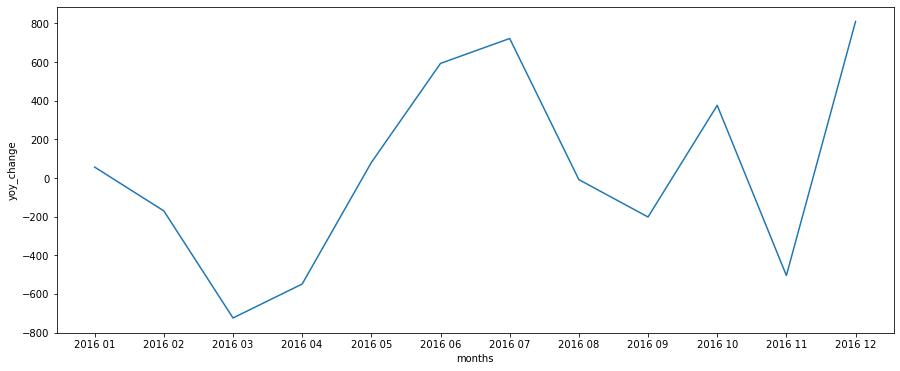

In [167]:
average_sales_df['yoy_change'] = average_sales_df['average_sales'] - average_sales_df['average_sales'].shift(12)
# Set the figure size to 10 inches wide and 6 inches tall

plt.figure(figsize=(15, 6))
# Create a line plot with the year on the x-axis and the YoY change on the y-axis
sns.lineplot(x='months', y='yoy_change', data=average_sales_df)

In [ ]:
%%sql
SELECT 
FROM 
ORDER BY 
LIMIT 5

In [ ]:
%%sql
SELECT *
FROM 
ORDER BY 
LIMIT 5

In [ ]:
%%sql
SELECT *
FROM 
ORDER BY 
LIMIT 5

In [ ]:
%%sql
SELECT *
FROM 
ORDER BY 
LIMIT 5

In [ ]:
Which channels 
SELECT *
FROM web_events
WHERE channel IN ('organic', 'adwords') AND occurred_at BETWEEN '2016-01-01' AND '2017-01-01'
ORDER BY occurred_at DESC;

<div style="border: 5px solid #6f00ff;
    border-radius: 20px; text-align: center; font-size: 20px; font-family: 'Merriweather'; padding: 16px 0; background-color: #F5E8DA">
  <b>What are the 10 latest orders?<b>
</div>

<div style="border: 5px solid #6f00ff;
    border-radius: 20px; text-align: center; font-size: 20px; font-family: 'Merriweather'; padding: 16px 0; background-color: #F5E8DA">
  <b>What are the 10 latest orders?<b>
</div>

<div style="border: 5px solid #6f00ff;
    border-radius: 20px; text-align: center; font-size: 20px; font-family: 'Merriweather'; padding: 16px 0; background-color: #F5E8DA">
  <b>What are the 10 latest orders?<b>
</div>

<div style="border: 5px solid #6f00ff;
    border-radius: 20px; text-align: center; font-size: 20px; font-family: 'Merriweather'; padding: 16px 0; background-color: #F5E8DA">
  <b>What are the 10 latest orders?<b>
</div>

<div style="border: 5px solid #6f00ff;
    border-radius: 20px; text-align: center; font-size: 20px; font-family: 'Merriweather'; padding: 16px 0; background-color: #F5E8DA">
  <b>What are the 10 latest orders?<b>
</div>


<div style="border: 10px solid #6f00ff;
    border-radius: 20px; text-align: center; padding: 20px 0; background-color: #F5E8DA">
  This is a curved edge border box with the color #6f00ff.
</div>



<footer style="background-color: #3D0069; color: white ; font-family: 'Merriweather'; font-weight: bold; text-align: center; padding: 20px 0; font-size: 16px;">
    <p style="text-align: center;"> <i>Datavestigating to connect the facts</i> </p>
    <p style="font-size: 14px; text-align: center;">&copy; The Datavestigator</p>   
</footer>